## Persistent homology - Level-set filtration

In this tutorial, we'll explore an alternative approach to calculating persistent homology - the <i>level-set filtration</i>. Like the Vietoris-Rips filtration (see previous tutorial), the level-set filtration provides a way of measuring topological properties of a dataset. However, while the Vietoris-Rips filtration acts on points, the level-set filtration can be applied to surfaces or heatmaps.

As an example, let's load in the `Synthetic-Points-Aggregation` dataset.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Aggregation
Number of objects: 2000
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

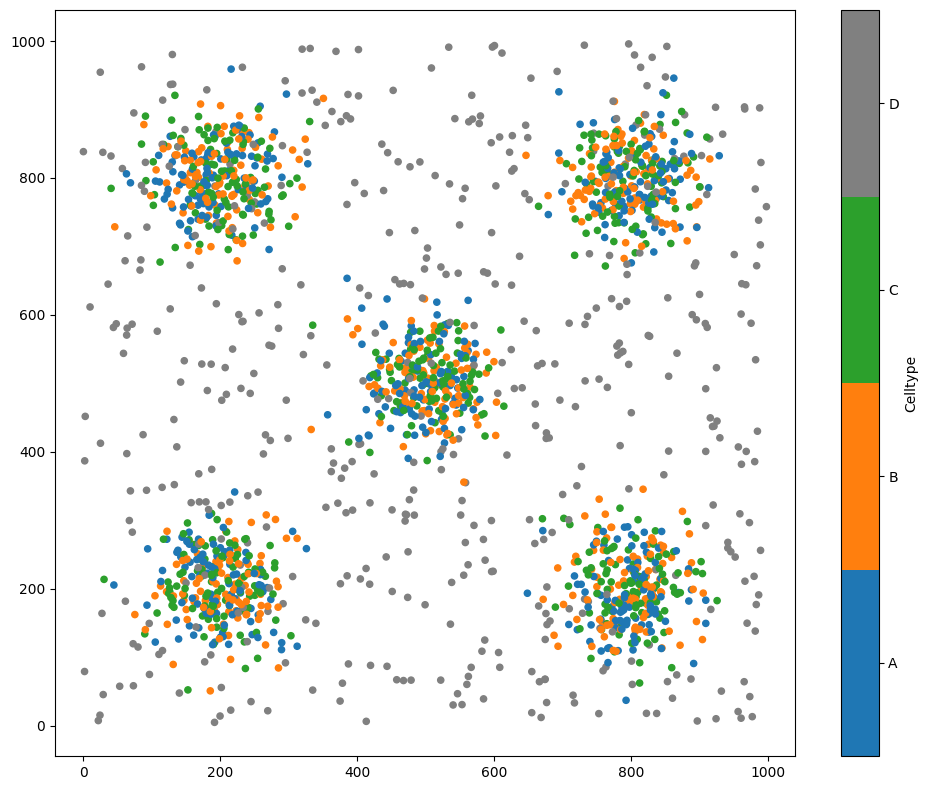

In [1]:
# Import the MuSpAn library
import muspan as ms

# Load the example domain dataset 'Synthetic-Points-Aggregation'
domain = ms.datasets.load_example_domain('Synthetic-Points-Aggregation')

# Visualise the domain with respect to 'Celltype'
ms.visualise.visualise(domain, 'Celltype')

The level-set filtration applies to heatmap-like (continuous) data. Let's looks at the density of Celltype A in this domain.

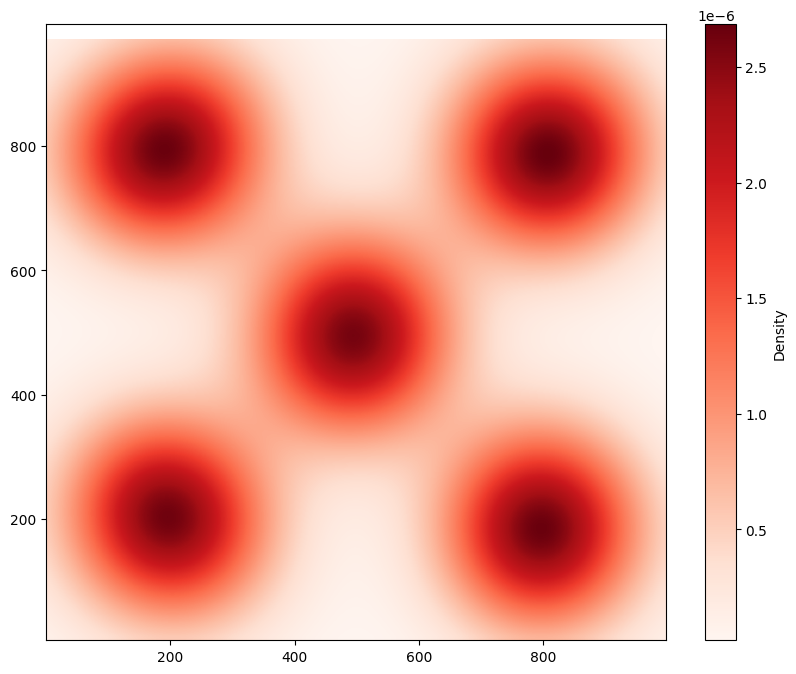

In [2]:
# Perform kernel density estimation for Celltype A in the domain
heatmap = ms.distribution.kernel_density_estimation(
    domain, 
    ('Celltype', 'A'), 
    visualise_output=True
)

The level-set filtration considers a "level-set" cut from this surface - think of it as though we're filling the heatmap up with water, starting from the lowest dips and filling up until the whole landscape is flooded. At any given level of flooding, the surface of the water is a flat surface, that may have holes in it where "islands" rise above the surface of the water. The $H_1$ components correspond to islands, with more persistent $H_1$ features corresponding to distinct islands of high density. In contrast, THe $H_0$ components correspond to the number of distinct "lakes" in the domain.

We can pass this heatmap directly into MuSpAn's topology module to calculate a level-set filtration.

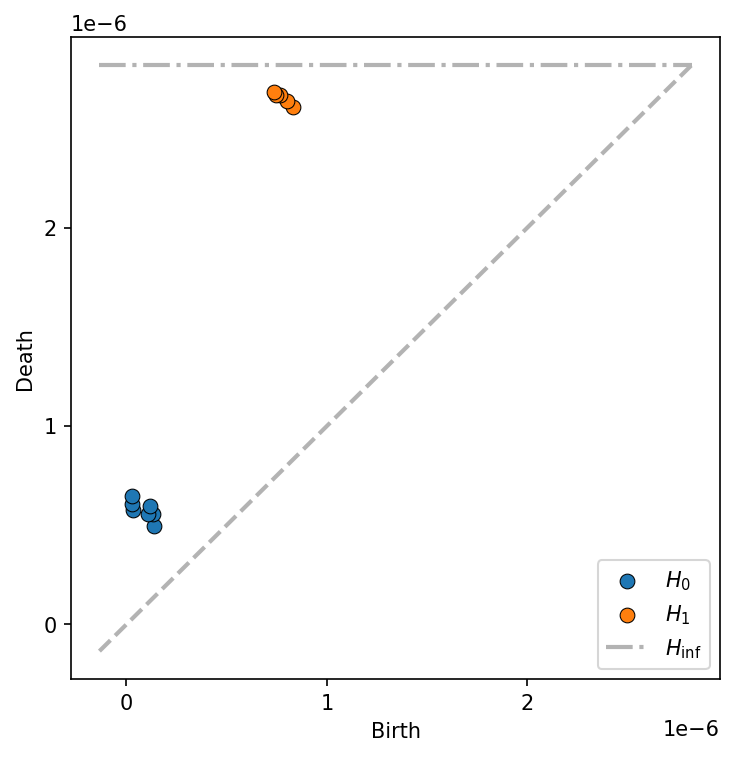

In [3]:
# Import the necessary library for plotting and set the resolution of the plots
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# Perform level-set filtration on the heatmap
output = ms.topology.level_set_filtration(heatmap)

# visualize the output
fig,ax=plt.subplots(figsize=(5,5))
ms.visualise.persistence_diagram(output, ax=ax)
ax.set_xticks([0, 1e-6, 2e-6])
ax.set_yticks([0, 1e-6, 2e-6])

As expected, we have five distinct $H_1$ components, which "die" when the level-set reaches 2.5e-6 - i.e., when the "water level" reaches the top of the most dense peaks. These distinct islands are "born" at around a density of 0.75e-6. We can interpret this diagram as quantifying five separate regions of high density of Celltype A, which contain the same density of cells, and which are separated by areas of lower Celltype A (at a density of 0.75e-6).